# <center>Trend Analysis for Ford GoBike Share System</center>
## <center> by Victoria Asefon</center>

## Investigation Overview

Ford GoBike (Now called Bay Wheels) is one of the largest public bicycle sharing system in San Francisco bay ares, United States. 

This analysis studies the trend in usage between customers and subscribers of Ford GoBike share service for a period of 1 year between 1 April 2018 to 31 April 2019.

## Dataset Overview

The dataset used in this Analysis contains 2,409,222 trips and 10 Features. The features include:

- duration in minutes
- trip start & end time
- start & end station name
- user_type: User Type (Subscriber or Customer)
- member_birth_year
- member_gender
- Age
- is_weekend

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import rcParams
import seaborn as sns
import datetime

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df =pd.read_csv('bikeshare_data_clean.csv')
df.head()

,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,duration_min,age,is_weekend
0,2018-04-30 22:49:00,2018-05-01 18:56:00,Cyril Magnin St at Ellis St,Cyril Magnin St at Ellis St,Customer,1983,Other,1206.55,35,0
1,2018-04-30 17:46:00,2018-05-01 16:16:00,19th St at Mission St,San Francisco City Hall (Polk St at Grove St),Customer,1983,Other,1350.57,35,0
2,2018-04-30 16:07:00,2018-05-01 16:02:00,Golden Gate Ave at Polk St,San Francisco Caltrain Station 2 (Townsend St...,Subscriber,1974,Male,1435.70,44,0
3,2018-04-30 17:11:00,2018-05-01 12:19:00,Yerba Buena Center for the Arts (Howard St at ...,Jackson Playground,Customer,1974,Female,1147.32,44,0
4,2018-04-30 18:45:00,2018-05-01 11:10:00,Grand Ave at Perkins St,12th St at 4th Ave,Customer,1965,Male,984.85,53,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2409222 entries, 0 to 2409221
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   start_time          object 
 1   end_time            object 
 2   start_station_name  object 
 3   end_station_name    object 
 4   user_type           object 
 5   member_birth_year   int64  
 6   member_gender       object 
 7   duration_min        float64
 8   age                 int64  
 9   is_weekend          int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 183.8+ MB


In [4]:
# Change wrong data types
df.start_time = pd.to_datetime(df['start_time'])
df.end_time = pd.to_datetime(df['end_time'])
df = df.astype({'user_type':'category',
                'member_birth_year':'int64'})

# <center>Trend Analysis</center>

## User Categories

There are two user groups; **Subscribers** and **Customers**.  Suscribers are members of an annual or a monthly plan while Customers pay for single trips only). 85.5% of users were Subscribers*, while 21.6% were Customers.

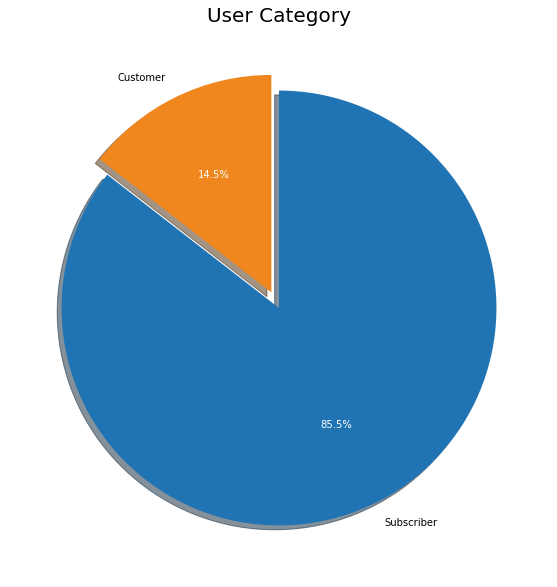

In [5]:
# plot a piechart of the different age groups
plt.figure(figsize = [10, 10])
_, _, autotexts = plt.pie(df.user_type.value_counts(), shadow=True, labels=['Subscriber','Customer'],
        startangle=90, counterclock=False, colors=[ '#2074b4','#ef871e'], explode = (0, 0.08), 
        radius = 1.0, autopct='%1.1f%%',)
# Change autopct text color to be white
for ins in autotexts:
    ins.set_color('white')
plt.title('User Category', fontsize=20, y=1.015)
plt.show();

## Monthly Growth Rate

There is steady increase in bike demand up till Jul 2018. Demand reduced slightly in August and September and recovered in October 2018. However, there was a drastic decrease in demand in November and December 2018 and since then, demand has fluctuated monthly. 

Changes in number of monthly trips tend to be similar for both user types.

Although, there has been slight increase in demand between April and July 2018, the month-over-month (MoM) growth has been on a decline. It however,hit rock bottom in November, 2018. MoM growth rate has flunctuated since then.

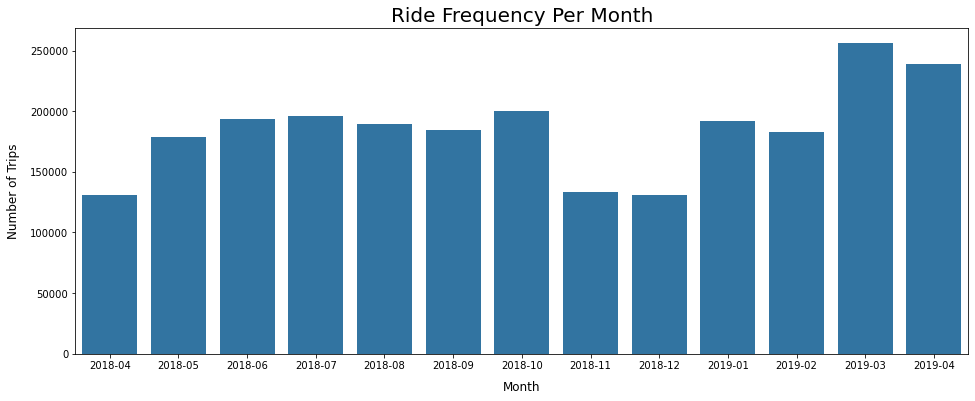

In [6]:
default_color = sns.color_palette()[0]
plt.figure(figsize=(16,6))
sns.countplot(x=df.start_time.dt.to_period('M'), color=default_color)
plt.title("Ride Frequency Per Month", fontsize=20)
plt.xlabel('Month', labelpad=10, fontsize=12)
plt.ylabel('Number of Trips', labelpad=10, fontsize=12);

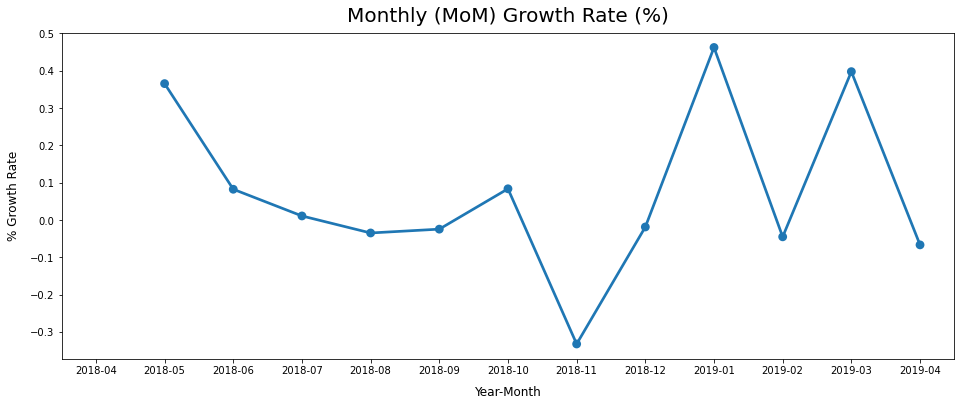

In [7]:
# MoM growth Rate
growth_rate = df.start_time.dt.to_period('M').value_counts().sort_index().pct_change()
plt.figure(figsize=[16,6])
sns.pointplot(x=growth_rate.index, y=growth_rate.values, color = default_color)
plt.title('Monthly (MoM) Growth Rate (%)', fontsize=20, y=1.015)
plt.xlabel('Year-Month', labelpad=10, fontsize=12)
plt.ylabel('% Growth Rate', labelpad=10, fontsize=12);

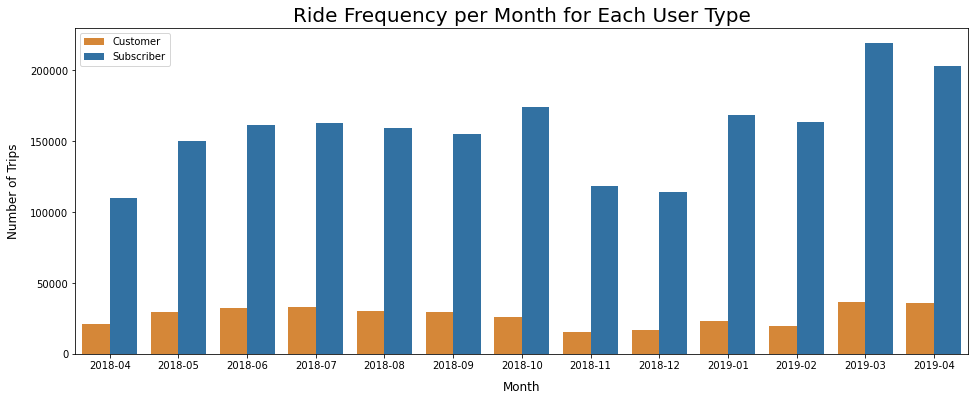

In [8]:
# Ride frequency per month for each user type
plt.figure(figsize=[16,6])
palette=['#ef871e', '#2074b4', '#00796B']
sns.countplot(x=df.start_time.dt.to_period('M'),  hue=df.user_type, palette=palette)
plt.title("Ride Frequency per Month for Each User Type", fontsize=20)
plt.xlabel('Month', labelpad=10, fontsize=12)
plt.ylabel('Number of Trips', labelpad=10, fontsize=12)
plt.legend(title='');

## Distribution of Duration

Trip durations ranges from  1 minute to about 80 minutes. The distribution is right-skewed on a linear scale but when plotted on a logarithmic scale, the distribution was roughly normal.

"Customers" tend to have more duration for their trips, and their distribution also have more spread compared to "Subscribers". 

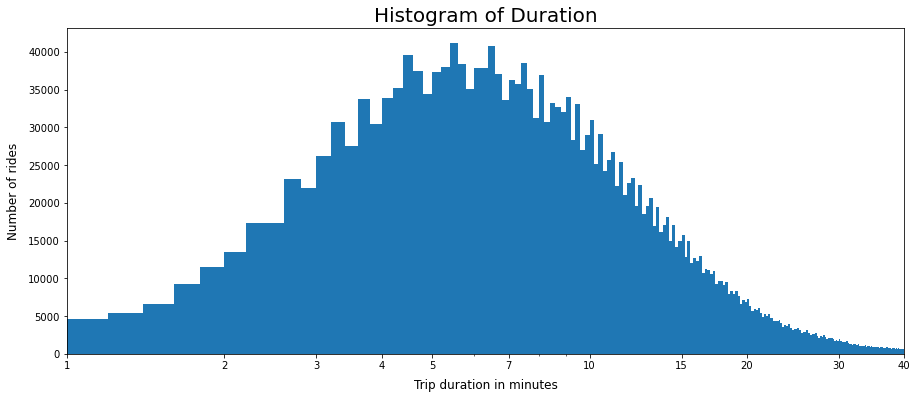

In [9]:
plt.figure(figsize=[15,6])
bins= np.arange(0, df.duration_min.max()+20, 0.2)
ticks = ticks = [1, 2, 3, 4, 5, 7, 10, 15, 20, 30, 40, 85]
labels = ['{}'.format(v) for v in ticks]
plt.hist(x=df.duration_min, bins=bins)
plt.xscale('log')
plt.xticks(ticks,labels)
plt.xlim(1,40)
plt.title('Histogram of Duration', fontsize=20)
plt.xlabel('Trip duration in minutes', labelpad=8, fontsize=12)
plt.ylabel('Number of rides', labelpad=8, fontsize=12);

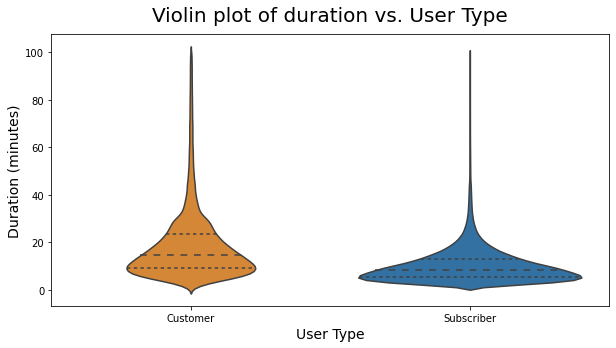

In [10]:
# Violin plot of `duration` vs `user type`
duration = df[df.duration_min<100]
plt.figure(figsize = (10,5))
sns.violinplot(data=duration, x='user_type', y='duration_min', color = default_color, inner='quartile',
               palette=['#ef871e', '#2074b4'])

plt.title('Violin plot of duration vs. User Type', fontsize=20, y=1.025)
plt.xlabel('User Type', fontsize=14)
plt.ylabel('Duration (minutes)', fontsize=14);

## Daily Ride Frequency

Customers demand follow a similar partern all through the week while Subscribers demand drops significantly on weekends. This indicates that subscribers use bikeshare services to commute to work while customers use the service for various reasons seeing as demand is consistent over the weekend.

Rush hours are between 8-9am in the morning, and 5-6pm in the evening. Although there are less "customers" than "suscribers" between 5am and 9am. there are more "customers from 10am to 4pm.

On average, Trips durations tend to be longer on weekends compared to workdays; Customers take longer trips than suscribers both on weekends and workdays

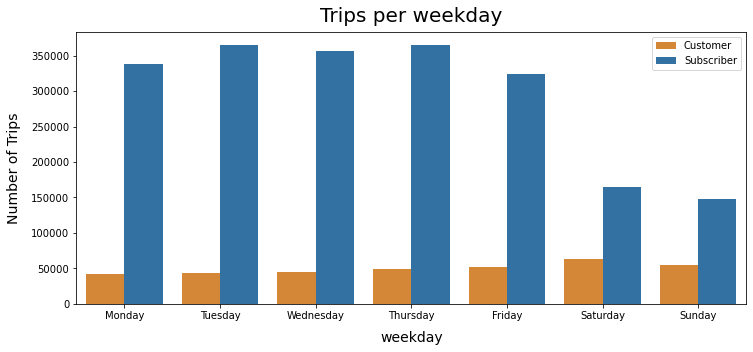

In [11]:
# daily frequency for each user type
plt.figure(figsize=[12,5])
weekday = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.countplot(x=df.start_time.dt.day_name(), order=weekday, hue=df.user_type,palette=palette)
plt.title('Trips per weekday', fontsize=20, y=1.015)
plt.xlabel('weekday', labelpad=10, fontsize=14)
plt.ylabel('Number of Trips', labelpad=10, fontsize=14)
plt.legend(title='');

In [12]:
# create masks for customers and subscribers
customer = df['user_type'] == 'Customer'
subscriber = df['user_type'] == 'Subscriber'

# Hours with most trips per user type
hourly_trips_customer = (df.start_time[customer].dt.hour.value_counts().sort_index())/df[customer].shape[0]
hourly_trips_subscriber = (df.start_time[subscriber].dt.hour.value_counts().sort_index())/df[subscriber].shape[0]

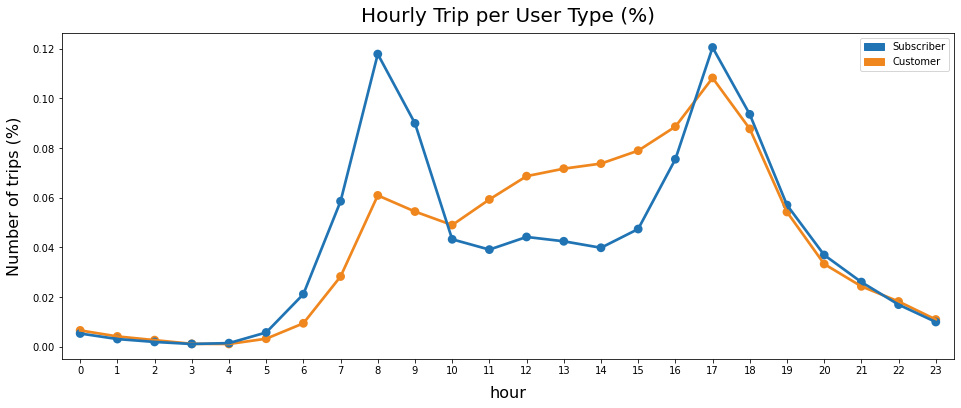

In [13]:
# Point plot for hourly rides per user type
plt.figure(figsize= (16,6))
sns.pointplot(x=hourly_trips_customer.index, y=hourly_trips_customer.values, color=palette[0])
sns.pointplot(x=hourly_trips_subscriber.index, y=hourly_trips_subscriber.values, color=palette[1])
plt.title('Hourly Trip per User Type (%)', fontsize=20, y=1.015)
plt.xlabel('hour', labelpad=10, fontsize=16)
plt.ylabel('Number of trips (%)', labelpad=10, fontsize=16)
# Creating artists specifically for adding to the legend (Proxy artists)
customer_legend = mpatches.Patch(color=palette[0], label='Customer')
subscriber_legend = mpatches.Patch(color=palette[1], label='Subscriber')
plt.legend(handles=[subscriber_legend, customer_legend])
plt.show();

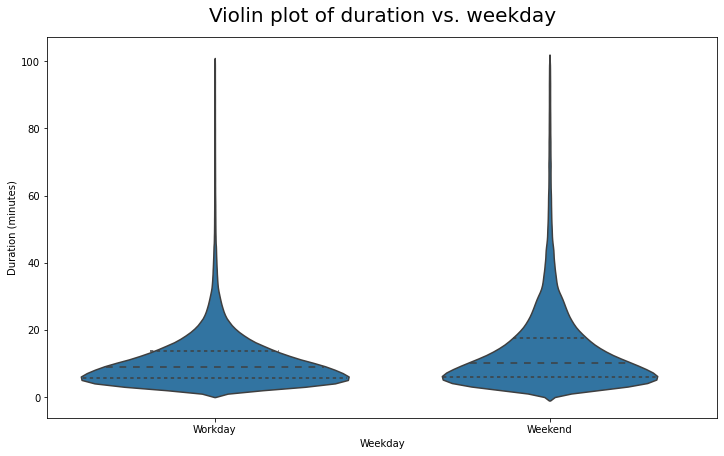

In [14]:
# Violin plot of `duration` vs `is_weekend`
plt.figure(figsize = (12,7))
sns.violinplot(data=duration, x='is_weekend', y='duration_min', color = default_color, inner='quartile')
ticks = [0, 1]
labels = ['Workday', 'Weekend']
plt.xticks(ticks, labels)
plt.title('Violin plot of duration vs. weekday', fontsize=20, y=1.025)
plt.xlabel('Weekday')
plt.ylabel('Duration (minutes)');

## Most popular Start and End Station

The most popular start and end stations are not entirely the same.

In [15]:
# most popular stations
top10_start_stations = df['start_station_name'].value_counts()[:10]
top10_end_stations = df['end_station_name'].value_counts()[:10]

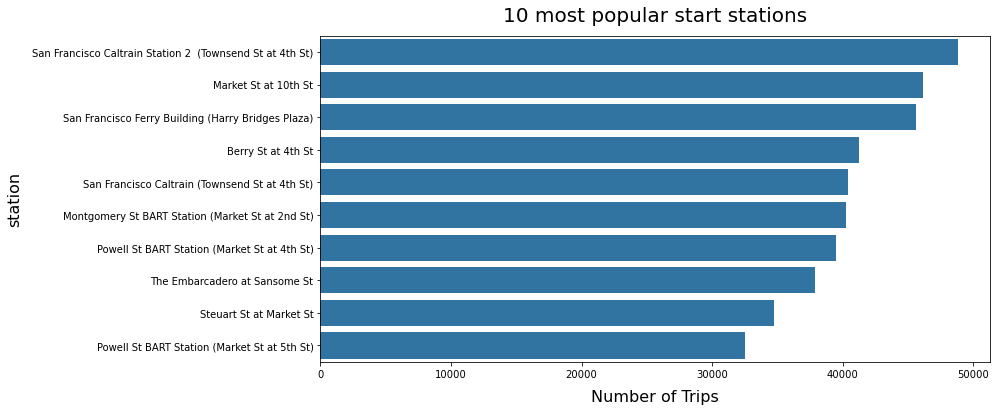

In [16]:
# 10 most popular start stations
plt.figure(figsize=(12,6))
sns.barplot(x=top10_start_stations, y=top10_start_stations.index, color=default_color)
plt.title('10 most popular start stations', fontsize=20, y=1.025)
plt.xlabel('Number of Trips', labelpad=10, fontsize=16)
plt.ylabel('station', labelpad=10, fontsize=16);

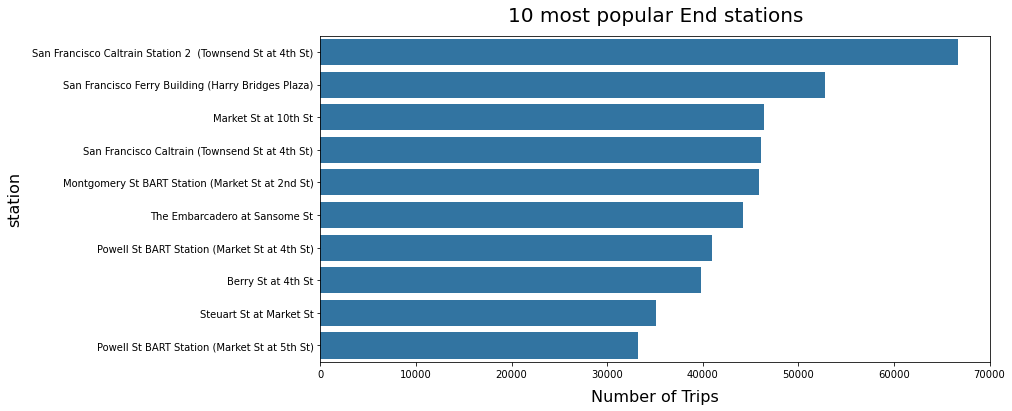

In [17]:
# 10 most popular end stations
plt.figure(figsize=(12,6))
sns.barplot(x=top10_end_stations, y=top10_end_stations.index, color=default_color)
plt.title('10 most popular End stations', fontsize=20, y=1.025)
plt.xlabel('Number of Trips', labelpad=10, fontsize=16)
plt.ylabel('station', labelpad=10, fontsize=16);

In [19]:
!jupyter nbconvert Ford-gobike-explanatory-analysis.ipynb --to slides --post serve --no-input --no-prompt

^C
